In [81]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [82]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

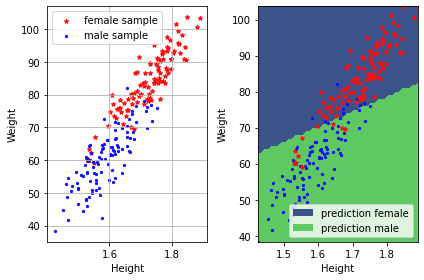

In [83]:
from least_squares import *
from plots import visualization

def least_square_classification_demo(y, x):
    # classify the data by linear regression: TODO
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    mse, w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [84]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    return np.exp(t) / (1 + np.exp(t))

In [85]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    return np.sum(np.log(1+np.exp(tx @ w)) - y * tx @ w)

In [86]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx @ w) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [87]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # compute the loss: TODO
    loss = calculate_loss(y, tx, w)

    # compute the gradient: TODO
    grad = calculate_gradient(y, tx, w)

    # update w: TODO
    w = w - gamma * grad

    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.54589280875939
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.964870635605585
Current iteration=500, loss=40.920089458713036
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.8953375338211
Current iteration=1000, loss=40.895021964119
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328358
Current iteration=1500, loss=40.8948272728955
loss=40.89482664256953


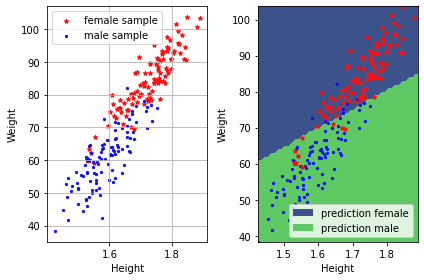

In [88]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [89]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # calculate Hessian: TODO
    
    S = np.diag((sigmoid(tx @ w) * (1 - sigmoid(tx @ w))).flatten())
    
    return tx.T @ S @ tx

Write a function below to return loss, gradient, and Hessian.

In [90]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # return loss, gradient, and Hessian: TODO
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [91]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # return loss, gradient and Hessian: TODO
    loss, gradient, hessian = logistic_regression(y, tx, w)

    # update w: TODO
    w = w - np.linalg.solve(hessian, gradient)
    
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909581
Current iteration=2, the loss=47.30458619935056
Current iteration=3, the loss=41.99746742248446
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989059
loss=40.894825609890574


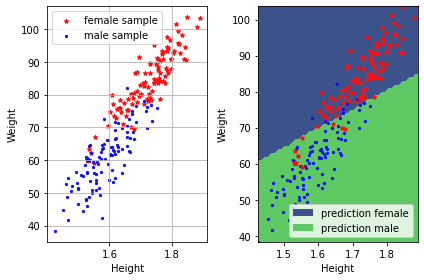

In [92]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [93]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and Hessian."""
    # return loss, gradient, and Hessian: TODO
    loss = np.sum(np.log(1+np.exp(tx @ w)) - y * tx @ w) + lambda_*np.linalg.norm(w) ** 2
    gradient = tx.T @ (sigmoid(tx @ w) - y) + 2*lambda_*w
    
    S = np.diag((sigmoid(tx @ w) * (1 - sigmoid(tx @ w))).flatten())
    hessian = tx.T @ S @ tx + np.diag(np.ones((1,3))*2*lambda_)
    return loss, gradient, hessian

In [94]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # return loss, gradient: TODO
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)

    # update w: TODO
    w = w - gamma * gradient

    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=46.07607269250497
Current iteration=200, loss=45.13699080586536
Current iteration=300, loss=45.02816989532987
Current iteration=400, loss=45.013256927182994
Current iteration=500, loss=45.01109477880315
Current iteration=600, loss=45.01077474325605
Current iteration=700, loss=45.01072699869884
Current iteration=800, loss=45.01071985437806
loss=41.80587008659322


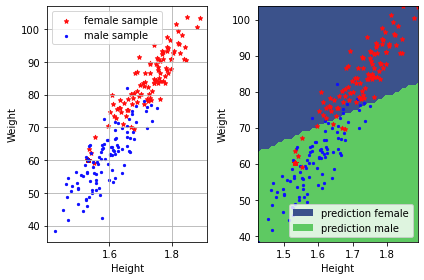

In [95]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)